In [1]:
#!pip install pandas scikit-learn matplotlib seaborn

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.1.1-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached 

In [2]:
#pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
"""
import pandas as pd
import numpy as np
#libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn. metrics import classification_report, confusion_matrix, accuracy_score"""


In [34]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime
#import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler,Normalizer
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

## Step 1 load the data

In [2]:
df_test_values = pd.read_csv('../data/test_values.csv')
df_test_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,t,r,...,1,0,0,0,0,0,0,0,0,0
86864,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,0
86865,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,0
86866,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#check for shape , missing value, info duplicate value in df_test_values

print(f'The test_values has {df_test_values.shape[0]} rows and {df_test_values.shape[1]} columns')
print('_________________________________________________________________')
print(f'The test_values has: \n {df_test_values.isnull().sum()} missing values')
print('_________________________________________________________________')
print(f'The test_values has{df_test_values.duplicated().sum()} duplicates')
print('_________________________________________________________________')
print(f'The test_values has: \n {df_test_values.info()}')


The test_values has 86868 rows and 39 columns
_________________________________________________________________
The test_values has: 
 building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar

In [5]:
# similarly check in train_labels and train_values data set

df_train_labels = pd.read_csv('../data/train_labels.csv')
df_train_labels.head()

print(f'The train_labels has {df_train_labels.shape[0]} rows and {df_train_labels.shape[1]} columns')
print('_________________________________________________________________')
print(f'The train_labels has: \n {df_train_labels.isnull().sum()} missing values')
print('_________________________________________________________________')
print(f'The train_labels has{df_train_labels.duplicated().sum()} duplicates')
print('_________________________________________________________________')
print(f'The train_labels has: \n {df_train_labels.info()}')

The train_labels has 260601 rows and 2 columns
_________________________________________________________________
The train_labels has: 
 building_id     0
damage_grade    0
dtype: int64 missing values
_________________________________________________________________
The train_labels has0 duplicates
_________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB
The train_labels has: 
 None


In [7]:
df_train_labels

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [8]:
# train_values
df_train_values = pd.read_csv('../Data/train_values.csv')


print(f'The train_values has {df_train_values.shape[0]} rows and {df_train_values.shape[1]} columns')
print('_________________________________________________________________')
print(f'The train_values has: \n {df_train_values.isnull().sum()} missing values')
print('_________________________________________________________________')
print(f'The train_values has{df_train_values.duplicated().sum()} duplicates')
print('_________________________________________________________________')
print(f'The train_values has: \n {df_train_values.info()}')

The train_values has 260601 rows and 39 columns
_________________________________________________________________
The train_values has: 
 building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mor

In [9]:
X = df_train_values
X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y = df_train_labels 
y.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [11]:
#Summary statistics of data
X.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


In [12]:
#value count for categorical labels

categorical_col = X.select_dtypes(include= ['object']).columns

#freq_count = {}
for feature in categorical_col:
    print(f'unique  value for {feature}:')
    print(X[feature].unique())
    #freq_count[feature] = X[feature].value_counts()
    print(X[feature].value_counts())

unique  value for land_surface_condition:
['t' 'o' 'n']
land_surface_condition
t    216757
n     35528
o      8316
Name: count, dtype: int64
unique  value for foundation_type:
['r' 'w' 'i' 'u' 'h']
foundation_type
r    219196
w     15118
u     14260
i     10579
h      1448
Name: count, dtype: int64
unique  value for roof_type:
['n' 'q' 'x']
roof_type
n    182842
q     61576
x     16183
Name: count, dtype: int64
unique  value for ground_floor_type:
['f' 'x' 'v' 'z' 'm']
ground_floor_type
f    209619
x     24877
v     24593
z      1004
m       508
Name: count, dtype: int64
unique  value for other_floor_type:
['q' 'x' 'j' 's']
other_floor_type
q    165282
x     43448
j     39843
s     12028
Name: count, dtype: int64
unique  value for position:
['t' 's' 'j' 'o']
position
s    202090
t     42896
j     13282
o      2333
Name: count, dtype: int64
unique  value for plan_configuration:
['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
plan_configuration
d    250072
q      5692
u      3649
s       346
c

In [13]:
#value count for numerical labels

numerical_col = X.select_dtypes(include= ['int64']).columns

#freq_count = {}
for feature in numerical_col:
    print(f'unique  value for {feature}:')
    print(X[feature].unique())
    #freq_count[feature] = X[feature].value_counts()
    print(X[feature].value_counts())

unique  value for building_id:
[802906  28830  94947 ... 602512 151409 747594]
building_id
802906    1
680296    1
802531    1
544902    1
823257    1
         ..
69364     1
735154    1
828266    1
513344    1
747594    1
Name: count, Length: 260601, dtype: int64
unique  value for geo_level_1_id:
[ 6  8 21 22 11  9 20  0 26 17 12 18  4 27 25 10  7  3 13 30 16  5 15 14
 19  1 24 28 23  2 29]
geo_level_1_id
6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: count, dtype: int64
unique  value for geo_level_2_id:
[487 900 363 ...  77 115 627]
geo_level_2_id
39      4038
158     2520
181     2080
1387    2040
157     1897
        ... 
1330       1
1043       1
637      

### Step 3 Visualisation

##### Ditribution plot of numerical col



In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [15]:
numerical_col = X.select_dtypes(include= ['int64']).columns
len(numerical_col)

31

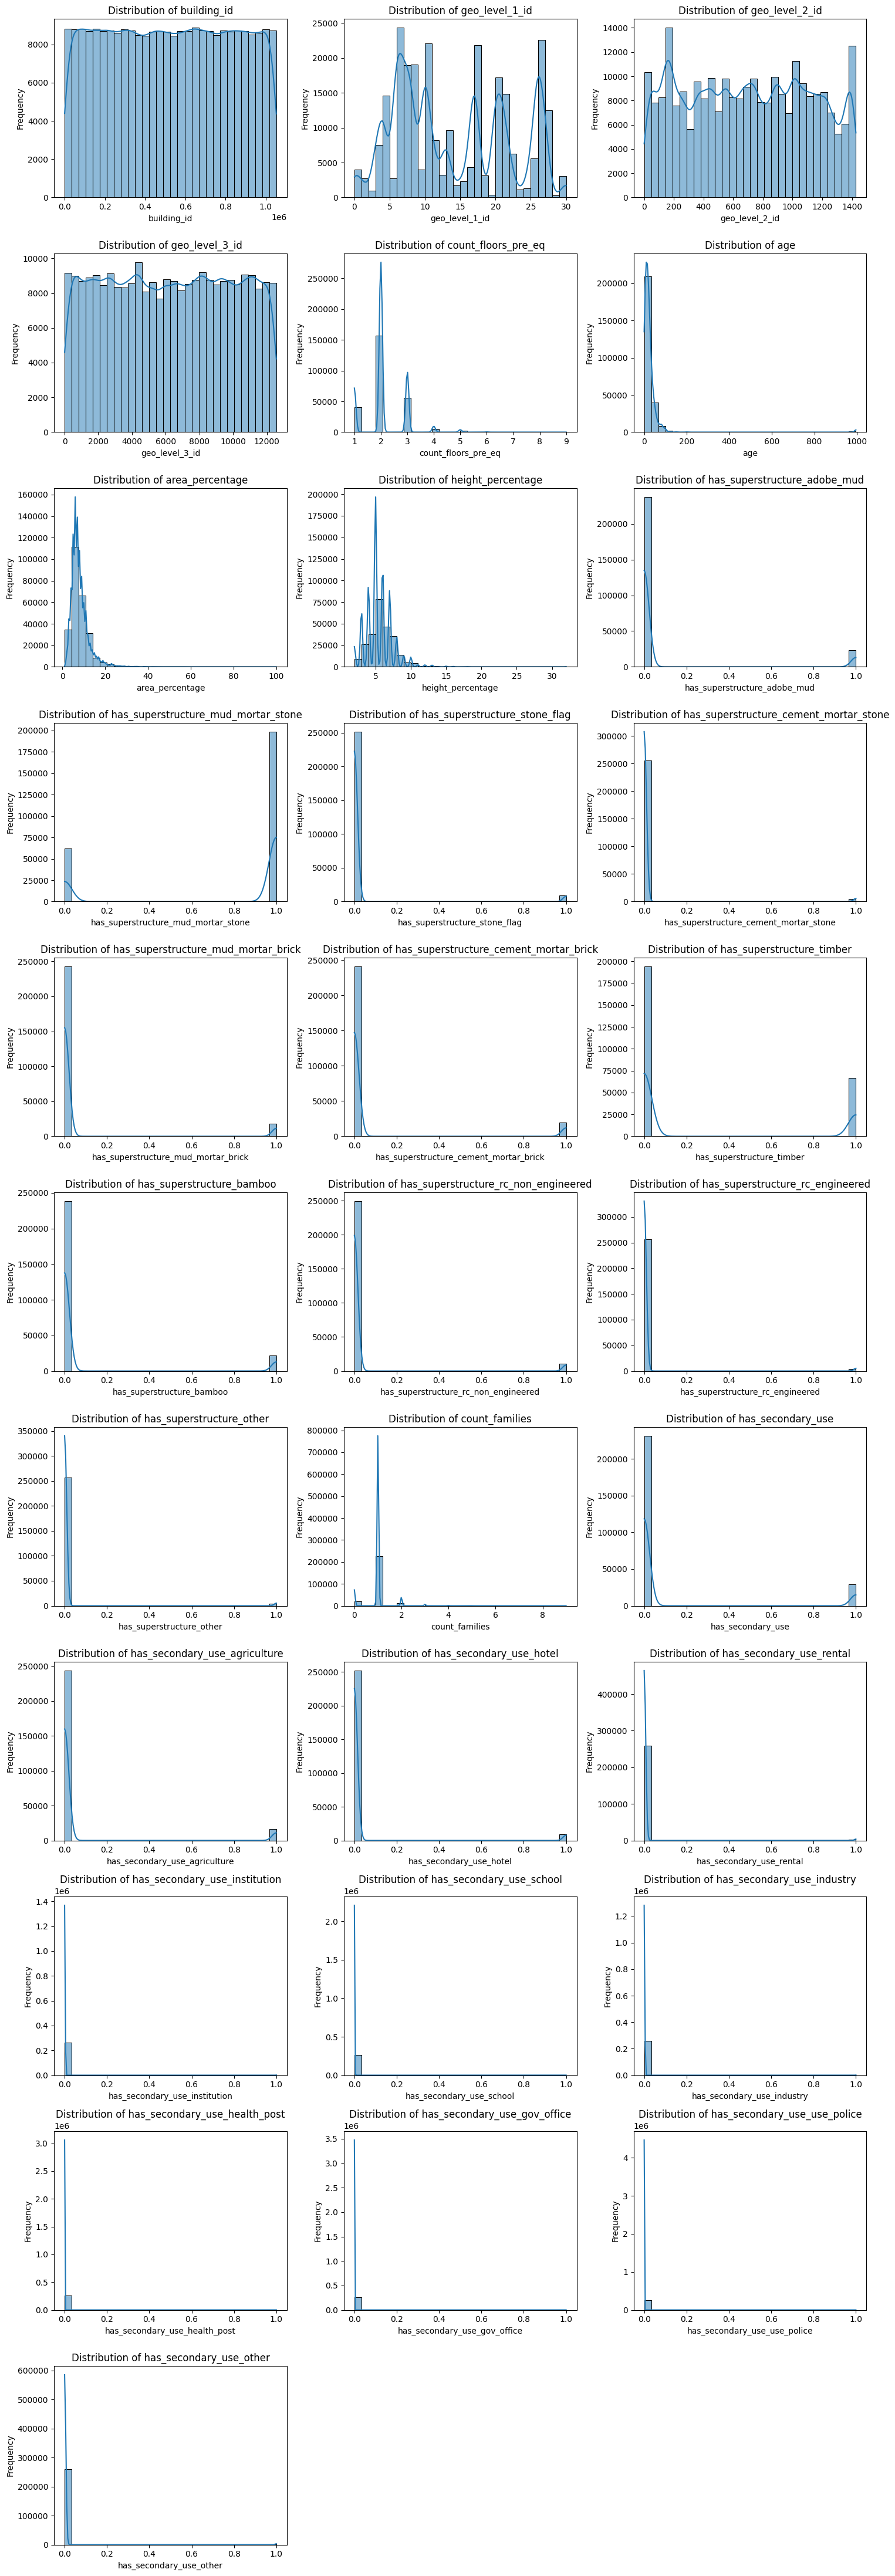

In [16]:
numerical_col = X.select_dtypes(include= ['int64']).columns

# Set the number of rows and columns for subplots
num_cols = 3  
num_rows = (len(numerical_col) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(15,num_rows*4))

for i, feature in enumerate(numerical_col):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(X[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Distribution plot of categorical column

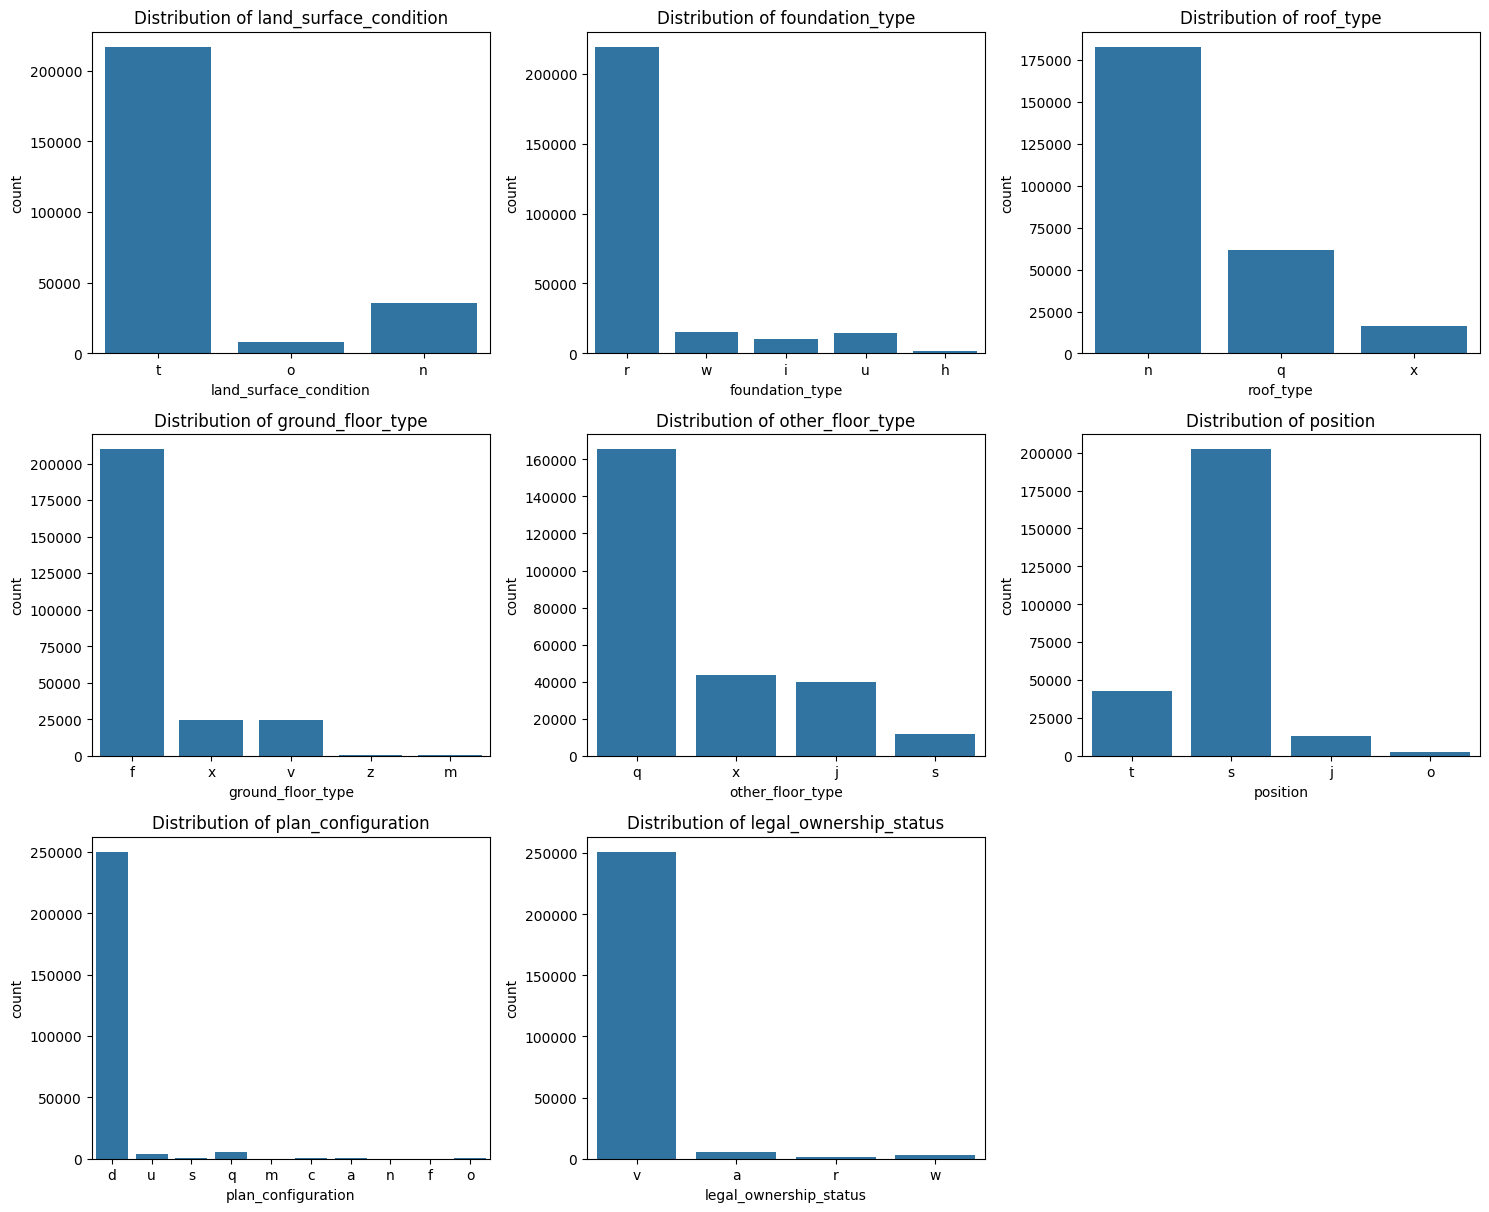

In [17]:
categorical_col = X.select_dtypes(include= ['object']).columns

num_cols = 3  
num_rows = (len(numerical_col) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(15,num_rows*4))

for i, feature in enumerate(categorical_col):
    plt.subplot(num_rows, num_cols, i+1)
    #sns.histplot(X[feature], bins=30, kde=True)
    sns.countplot(x =X[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('count')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

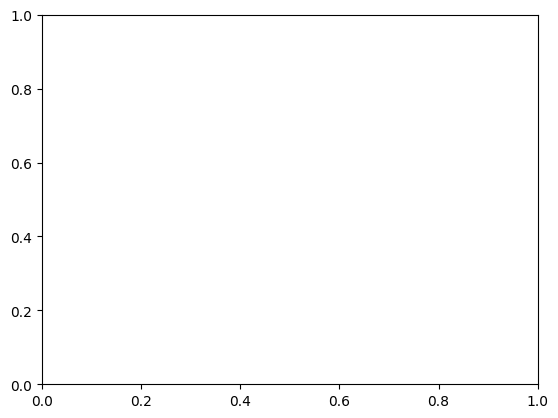

In [19]:
"""### Distribution of target variable

sns.countplot(y['damage_grade'])
plt.title('Distribution of Damagrade')
plt.xlabel('Damage Grade')
plt.ylabel('count')           
plt.show()"""

In [25]:
categorical_col = X.select_dtypes(include= ['object']).columns
categorical_col

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [26]:
df_train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# v1: drop categorical values
X=df_train_values.drop(columns=categorical_col)
X

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,0,1,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,0,1,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,0,1,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [31]:
y = y["damage_grade"]
y

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

In [35]:
# train validation split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42,test_size=0.2)

In [37]:
val_X

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
111801,1023112,10,1224,11128,1,20,7,3,0,1,...,0,0,0,0,0,0,0,0,0,0
91817,64407,22,1101,12483,2,60,7,6,0,1,...,0,0,0,0,0,0,0,0,0,0
251661,967834,26,39,11440,2,50,6,5,0,0,...,0,0,0,0,0,0,0,0,0,0
205479,36669,8,1073,2743,3,50,7,6,0,1,...,0,0,0,0,0,0,0,0,0,0
22618,242842,6,706,7959,2,15,8,4,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209800,1009416,17,51,8163,3,5,9,7,0,1,...,0,1,0,0,0,0,0,0,0,0
45779,530277,20,922,1378,2,10,8,5,0,1,...,0,0,0,0,0,0,0,0,0,0
177645,216791,7,1233,5131,2,35,6,5,0,1,...,0,1,0,0,0,0,0,0,0,0
36857,767934,10,142,3523,2,15,5,5,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
train_X

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
170377,739427,13,257,8352,3,25,2,5,1,0,...,0,0,0,0,0,0,0,0,0,0
184895,17201,6,1076,9202,3,40,10,8,0,1,...,0,0,1,0,0,0,0,0,0,0
26740,723805,7,838,10723,2,45,8,5,0,1,...,0,0,0,0,0,0,0,0,0,0
198210,891512,7,555,2763,2,30,7,4,0,1,...,0,0,0,0,0,0,0,0,0,0
254313,484350,17,682,1039,3,30,6,7,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,79888,13,909,1626,2,25,6,5,0,1,...,0,0,0,0,0,0,0,0,0,0
103694,442764,10,1397,8182,2,5,5,4,0,1,...,0,0,0,0,0,0,0,0,0,0
131932,17256,8,1073,5249,3,20,22,7,0,1,...,0,1,0,0,0,0,0,0,0,0
146867,496181,10,76,1841,3,10,11,7,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
"""#using the random forest

rf_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)

#fit the model
rf_model.fit(train_X, train_y)"""

RandomForestRegressor(max_depth=5, random_state=0)

In [39]:
#random forest with gini
rf = RandomForestClassifier(criterion='entropy',n_estimators=200,max_depth=4,n_jobs=-1)

rf.fit(train_X,train_y)

rf_predict = rf.predict(val_X)

f1_score(val_y, rf_predict, average="micro")

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200,
                       n_jobs=-1)

array([0.05571135, 0.72350146, 0.        ])